In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

We will use classification algorithms to predict, using the Online shopper behavior dataset, whether Revenue will be 
generated from the following features.  Administrative is the administrative web page, which is used to keep the website 
efficient and secure.  Administrative_Duration is the average time that users spend on the administrative page.  
Informational is the information web page, which has all the general content about the website on it.  
Informational_Duration is the average time that users spend on the information page.  ProductRelated is the product related 
web pages, which displays all of the products to consumers. ProductRelated Duration is the average time consumers spend on 
the product related pages.  BounceRates are the average times that users have left the website homepage without accessing 
any other pages.  ExitRates are the average times that users exited each page.  PageValues are the average times that a page
leads to revenue.  SpecialDay is specific days that may have more tranactions.  Month is each month of the year.  
OperatingSystems are the operating system used by the user.  Browser is the Browser used by the user.  Region is the 
location of the user.  TrafficType is the average amount of people using the website at once.  VisitorType is whether the 
user is a new or reoccurrring visitor.  Weekend is whether revenue occured on the weekend.  Revenue is whether revenue was 
generated.

In [4]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Data Mining

View how many rows and columns in dataframe.

In [82]:
df.shape

(12330, 18)

View unique values from each column

In [81]:
for column in df:
    print(column,df[column].unique())

Administrative [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]
Administrative_Duration [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
Informational [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]
Informational_Duration [  0.    -1.   120.   ... 547.75 368.25 211.25]
ProductRelated [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60.  nan 104. 129.  77.
  74.  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.
  95. 130. 151. 117. 124. 127

Check for null values.  

In [86]:
df.isnull().values.any()

True

Find which columns have null values

In [85]:
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

# Data Cleaning

Make features that are categorical have a category data type.  

In [8]:
df['Month']=df['Month'].astype('category')
df['VisitorType']=df['VisitorType'].astype('category')
df['Weekend']=df['Weekend'].astype('category')
df['Revenue']=df['Revenue'].astype('category')

Encode categorical features.

In [9]:
df['Month']=df['Month'].cat.codes
df['VisitorType']=df['VisitorType'].cat.codes
df['Weekend']=df['Weekend'].cat.codes
df['Revenue']=df['Revenue'].cat.codes

Make NaN values have the mean value.

In [10]:
df=df.mask(df=='NaN').fillna(df.mean())

C:\Users\Student\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Make dataframe have float data type.  

In [11]:
df.astype('float64')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2.0,4.0,1.0,9.0,3.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1.0,4.0,6.0,1.0,1.0,2.0,1.0,0.0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,7.0,3.0,2.0,1.0,8.0,2.0,1.0,0.0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,7.0,3.0,2.0,1.0,13.0,2.0,1.0,0.0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,7.0,2.0,2.0,3.0,11.0,2.0,0.0,0.0


# Data Exploration

Let's view the data statistics. 

In [88]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Data is not normally distributed.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AC6EBFA48>,
      dtype=object)

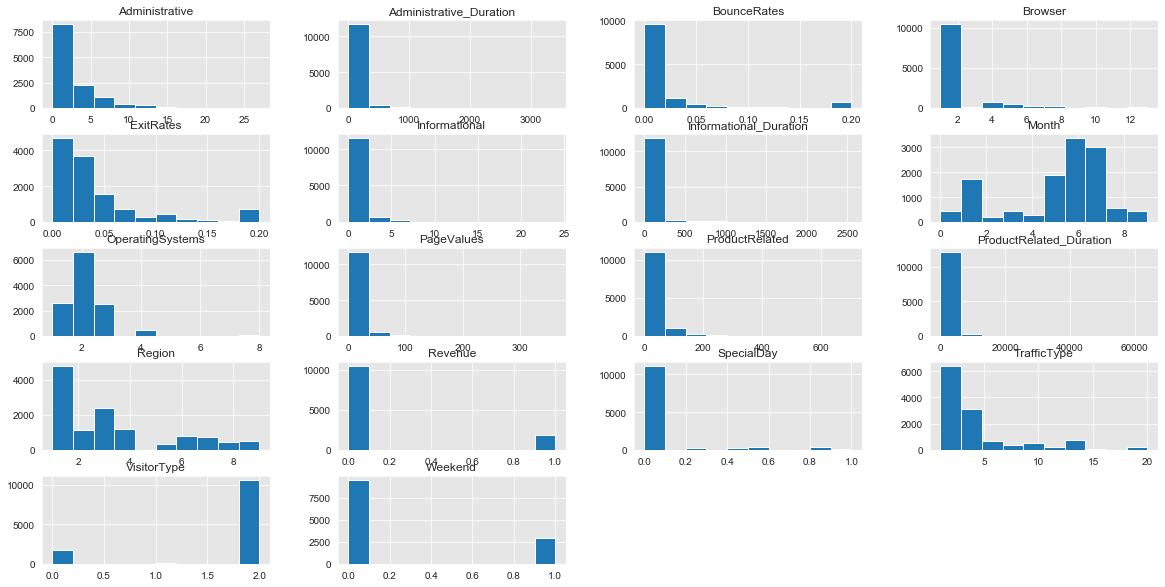

In [265]:
df.hist(figsize=(20,10))

Most of the data has low variance, except product related duration.   

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

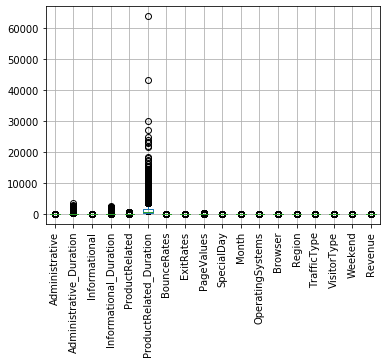

In [70]:
df.boxplot()
plt.xticks(rotation=90)

The correlated features are ProductRelated_Duration with ProductRelated and  BounceRates with ExitRates.  

In [255]:
df.corr() >.7

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Administrative_Duration,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Informational,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Informational_Duration,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ProductRelated,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
ProductRelated_Duration,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
BounceRates,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
ExitRates,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
PageValues,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
SpecialDay,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


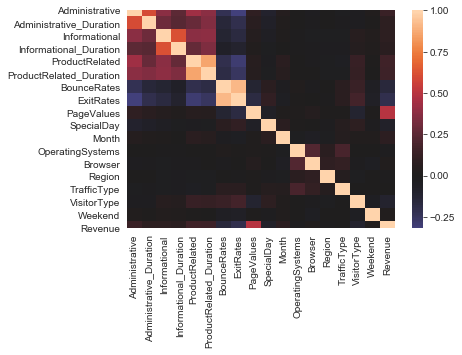

In [257]:
sns.heatmap(df.corr(), center=0);

Revenue occurs as False more often than it does as True.  This is a class imbalance issue. 

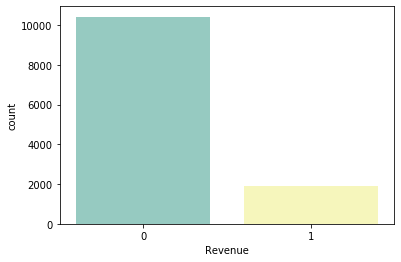

In [73]:
sns.countplot(df['Revenue'], palette='Set3')

Distribusion of each feature toward revenue.  Notice that the PageValue feature mean for True Revenue is larger than the one
for False Revenue.  It is likely that PageValue has a positive effect on Revenue.   

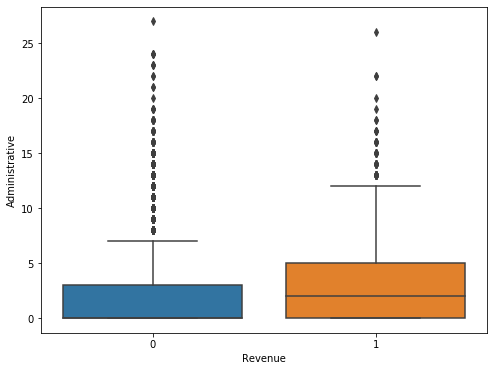

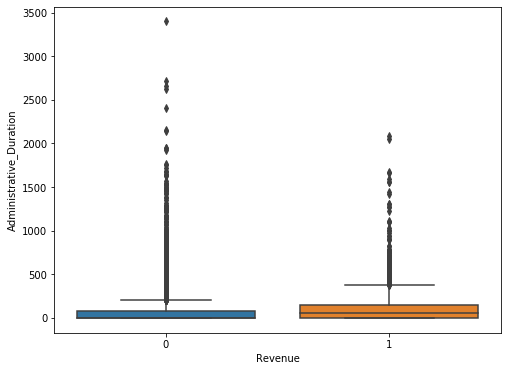

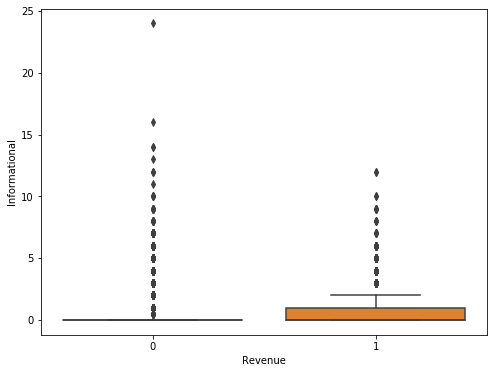

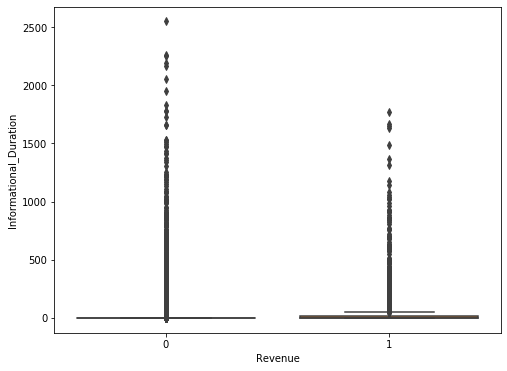

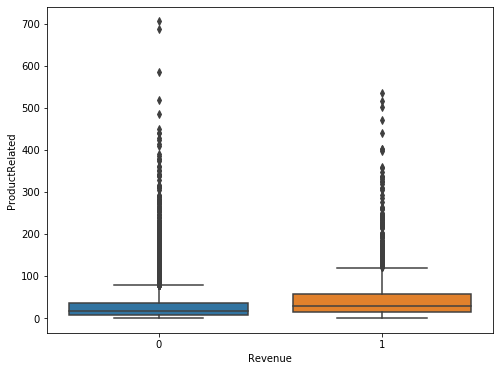

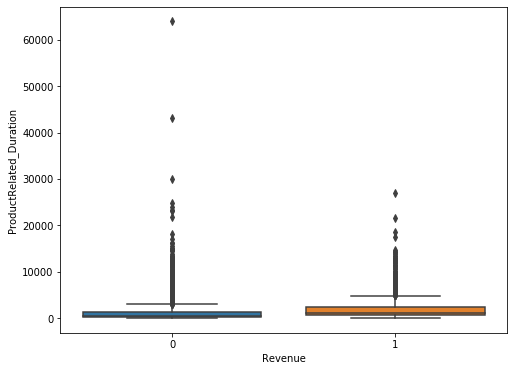

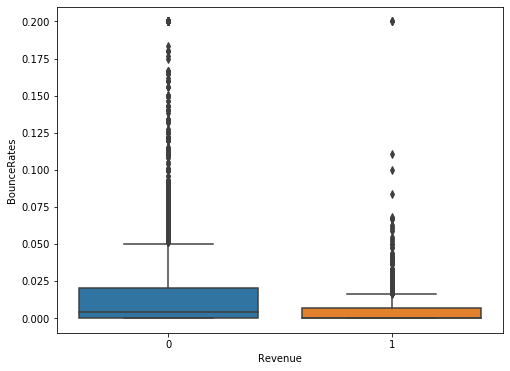

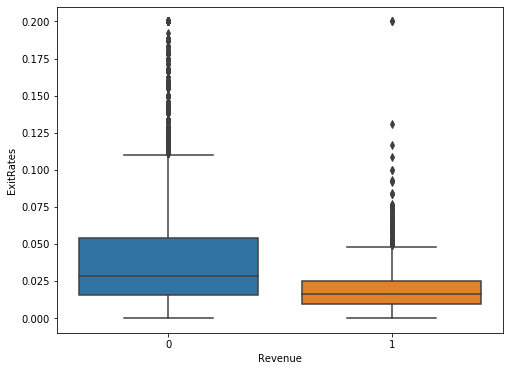

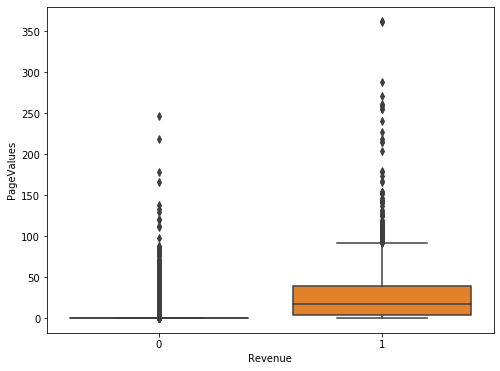

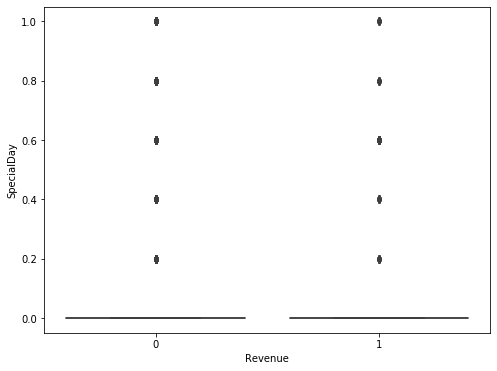

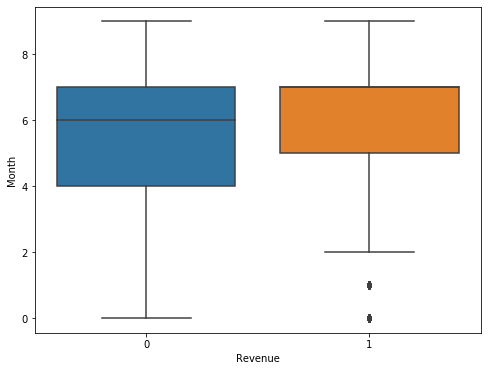

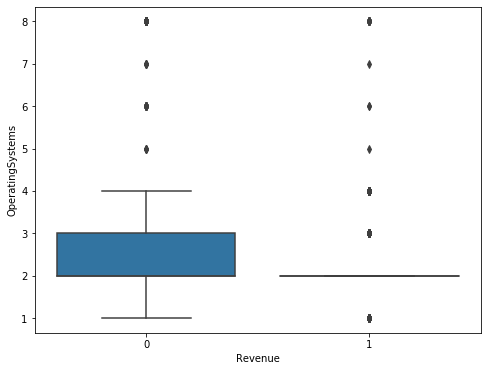

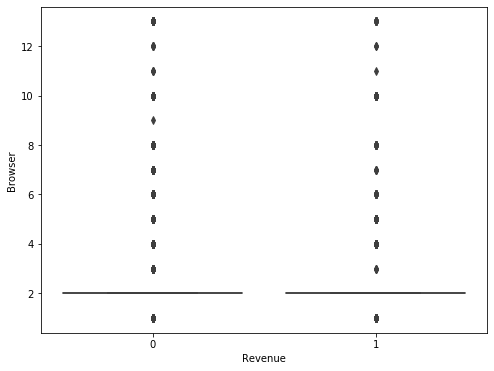

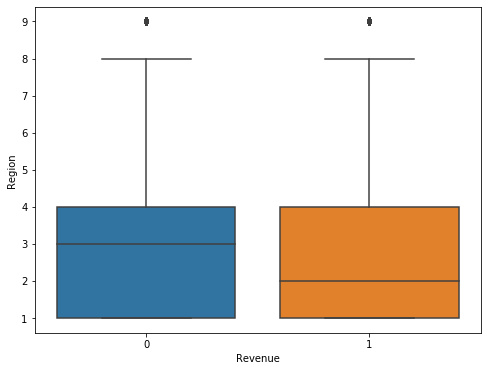

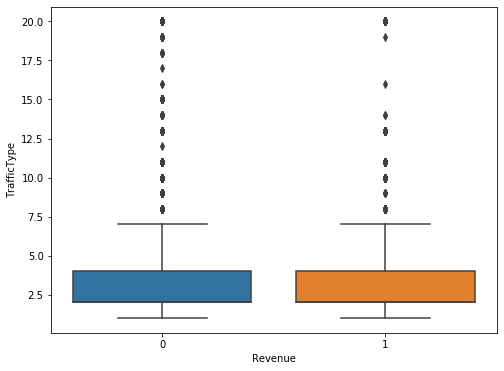

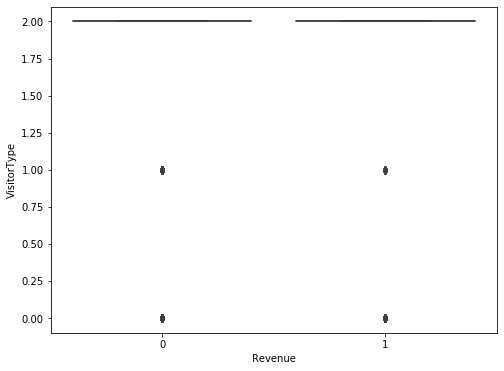

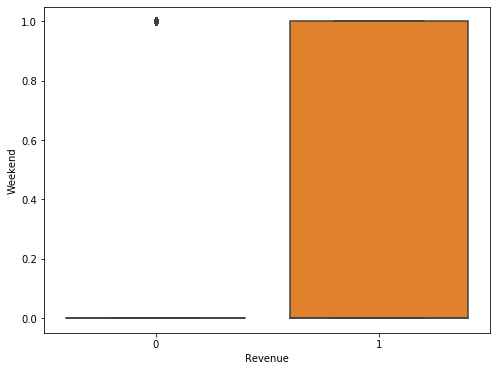

In [74]:
for i in df_columns:
    fig = plt.figure(figsize=(8,6)) 
    sns.boxplot(x=df['Revenue'], y=df[i], data=df)
    plt.show()

# Feature Engineering

Create features and labels

In [12]:
X = df.drop('Revenue', axis=1)  
y = df['Revenue'] 

Perform an 80/20 train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10) 

Normalize the data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

Class Imbalance occurs when one class occurs less often than another class, causing the less occurrring class to not be
represented well for prediction.

Redistribute Revenue classes

In [17]:
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
scaled_data_train_resampled, y_train_resampled = smote.fit_sample(scaled_data_train, y_train) 
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    10422
1     1908
Name: Revenue, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    8333
0    8333
Name: Revenue, dtype: int64


# Predictive Modeling

Logistic Regression uses a sigmoid function to classify binary data.  We will use Logistic Regression to classify whether it
is likely that revenue resulted from the dataframe features.   

Initiate and fit the logistic regression model.  

In [19]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')


logistic_regression.fit(scaled_data_train_resampled, y_train_resampled)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

Generate predictions from the normalized data.  

In [20]:
y_hat_train_lr = logistic_regression.predict(scaled_data_train_resampled)

Conduct cross validation.

In [21]:
from sklearn.model_selection import cross_val_score

lr_cv_score = cross_val_score(logistic_regression, scaled_data_test, y_test, cv=5)
mean_lr_cv_score = np.mean(lr_cv_score)

print(f"Mean Cross Validation Score: {mean_lr_cv_score :.2%}")

Mean Cross Validation Score: 87.15%


The features that are important to predicting revenue are the ones that have a positive importance score.  A score of 0 
means a feature has no effect on revenue and a negative score means that the feature has an inverse effect on revenue.  

PageValue has the largest positive effect on Revenue.  Administrative, Informational, ProductRelated, 
ProductRelated_Duration, BounceRates, Month, Browser, and Weekend had a small possitive effect on Revenue.    Administrative_Duration, Informational_Duration, ExitRatess, SpecialDay, Region, TrafficType, and VisitorType had a small negative effect on Revenue.  

In [22]:
X = df.drop('Revenue', axis=1)
df_columns=[]
for i in X.columns:
    df_columns.append(i)

importance_lr = logistic_regression.coef_[0]

for i,c in zip(importance_lr,df_columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: Administrative, Score: 0.009443889056148742
Feature: Administrative_Duration, Score: -0.09031724004048593
Feature: Informational, Score: 0.06324426716195856
Feature: Informational_Duration, Score: -0.015322073914780564
Feature: ProductRelated, Score: 0.24826937586680844
Feature: ProductRelated_Duration, Score: 0.07329083359528896
Feature: BounceRates, Score: 0.07079412611086175
Feature: ExitRates, Score: -0.3929492640762338
Feature: PageValues, Score: 2.9150480370644276
Feature: SpecialDay, Score: -0.2135387462424868
Feature: Month, Score: 0.25304988755404945
Feature: OperatingSystems, Score: -0.049338785872343596
Feature: Browser, Score: 0.009729258723553806
Feature: Region, Score: -0.06304919349258552
Feature: TrafficType, Score: -0.012289413288903397
Feature: VisitorType, Score: -0.12693281073025087
Feature: Weekend, Score: 0.007538425347370926


<BarContainer object of 17 artists>

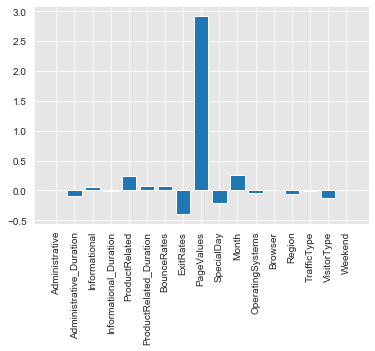

In [39]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_lr)

The metrics that we will use to measure the model are precision, recall, accuracy, recall.  Precision is the percentage of 
true positive classifications from all positive classifications. Recall is the percentage of true positive classifications 
from all true classifications. Accuracy is the pecentage of true classifications from all classifications. f1 score is the 
harmonic mean of precision and recall.  Validate with the train and test split. 

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def Metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true positives and more true negatives at the expense of more false negatives. The Accuracy indicates that the model classified true values well. The f1 Score, weighted average between percision and recall, indicates that percision and recall are harmonic.

In [25]:
Metrics(y_train_resampled,y_hat_train_lr)

Precision Score: 0.8756444109141205
Recall Score: 0.8357134285371415
Accuracy Score: 0.858514340573623
F1 Score: 0.855213066437431


The model correctly classified 7344 observations as false, true negatives, and 6964 observations as true, true positives, 
and misclassified 989 observations as true, false positives, and 1369 observations as false, false negatives.  

In [42]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train_resampled, y_hat_train_lr, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,7344,989,8333
1,1369,6964,8333
All,8713,7953,16666


ROC curve measures the true positive rate per false positive rate.  

The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [26]:
from sklearn.metrics import roc_curve, auc

false_positive_train_rate_lr, true_positive_train_rate_lr, thresholds = roc_curve(y_train_resampled,y_hat_train_lr)
roc_auc = auc(false_positive_train_rate_lr, true_positive_train_rate_lr)

AUC: 0.8585143405736231


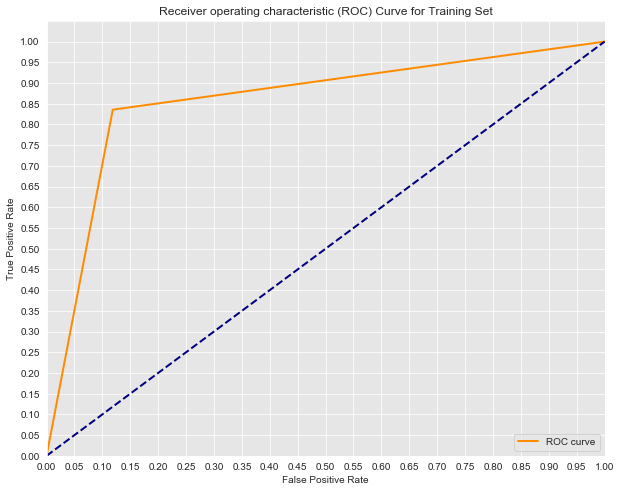

In [27]:
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_lr, true_positive_train_rate_lr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_lr, true_positive_train_rate_lr)))
plt.show()

Perform a grid search to determine whether parameters can be improved. 

Make a grid to hold parameters.

In [31]:
lr_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

Conduct grid search.

In [32]:
from sklearn.model_selection import GridSearchCV

lr_grid_search=GridSearchCV(logistic_regression,lr_grid,cv=5)
lr_grid_search.fit(scaled_data_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1000000000000.0,
                                          fit_intercept=False,
                                          solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

Display grid search optimal parameters.

In [33]:
print(f"Optimal Parameters: {lr_grid_search.best_params_}")

Optimal Parameters: {'C': 0.01, 'penalty': 'l1'}


Make new model with adjusted parameters.  

In [35]:
logistic_regression_parameter_adjusted=LogisticRegression(C=.01,penalty="l1", solver='liblinear')
logistic_regression_parameter_adjusted.fit(scaled_data_train_resampled, y_train_resampled)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

Generate predictions.

In [36]:
y_hat_train_parameter_adjusted_lr = logistic_regression_parameter_adjusted.predict(scaled_data_train_resampled)

The feature that positively affects Revenue the most is PageValues. Informational, ProductRelated, ProductRelated_Duration, 
and Month had a small positive affect on Revenue.  ExitRates, SpeciaDay, OperatingSystems, Region, and VisitorType had a small negative 
affect on Revenue.  Administrative, Administrative_Duration, Informational_Duration, BounceRates, Browser, 
TrafficType, and Weekend had no effect on Revenue.

In [37]:
importance_lr_parameter_adjusted = logistic_regression_parameter_adjusted.coef_[0]
for i,c in zip(importance_lr_parameter_adjusted,df_columns):
    print(f'Feature: {c}, Score: {i}')

Feature: Administrative, Score: 0.0
Feature: Administrative_Duration, Score: 0.0
Feature: Informational, Score: 0.03547163656513658
Feature: Informational_Duration, Score: 0.0
Feature: ProductRelated, Score: 0.24812926975227778
Feature: ProductRelated_Duration, Score: 0.05196820342727885
Feature: BounceRates, Score: 0.0
Feature: ExitRates, Score: -0.5833688078608127
Feature: PageValues, Score: 2.223979882859874
Feature: SpecialDay, Score: -0.1874337688183938
Feature: Month, Score: 0.248932603149897
Feature: OperatingSystems, Score: -0.0137228462059639
Feature: Browser, Score: 0.0
Feature: Region, Score: -0.027269091627047135
Feature: TrafficType, Score: 0.0
Feature: VisitorType, Score: -0.06037292587546419
Feature: Weekend, Score: 0.0


<BarContainer object of 17 artists>

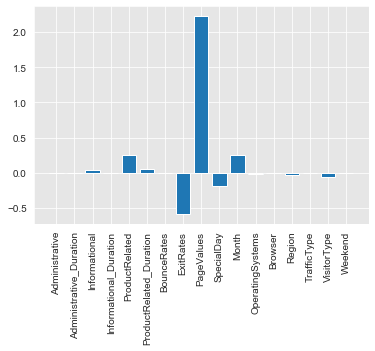

In [40]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_lr_parameter_adjusted)

Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true 
positives and more true negatives at the expense of more false negatives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [41]:
Metrics(y_train_resampled,y_hat_train_parameter_adjusted_lr)

Precision Score: 0.8923884514435696
Recall Score: 0.7752310092403696
Accuracy Score: 0.8408736349453978
F1 Score: 0.8296943231441047


The model correctly classified 7554 observations as false and 6460 observations as true, and misclassified 779 observations 
as true and 1873 observations as false.  

In [43]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train_resampled, y_hat_train_parameter_adjusted_lr, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,7554,779,8333
1,1873,6460,8333
All,9427,7239,16666


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [44]:
false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr, thresholds = roc_curve(y_train_resampled, y_hat_train_parameter_adjusted_lr)
roc_auc = auc(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr)

AUC: 0.8408736349453978


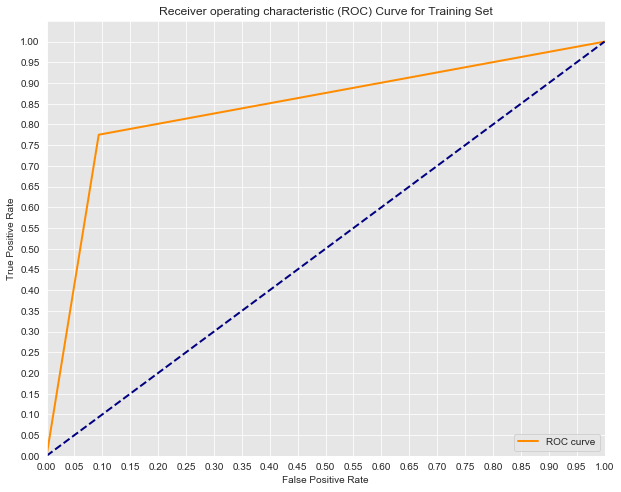

In [45]:
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr)))
plt.show()

ROC model comparison shows that model without adjusted parameters performs better.  

Resampled
Logistic Regression AUC: 0.8585143405736231
Logistic Regression Parameter Adjusted AUC: 0.8408736349453978


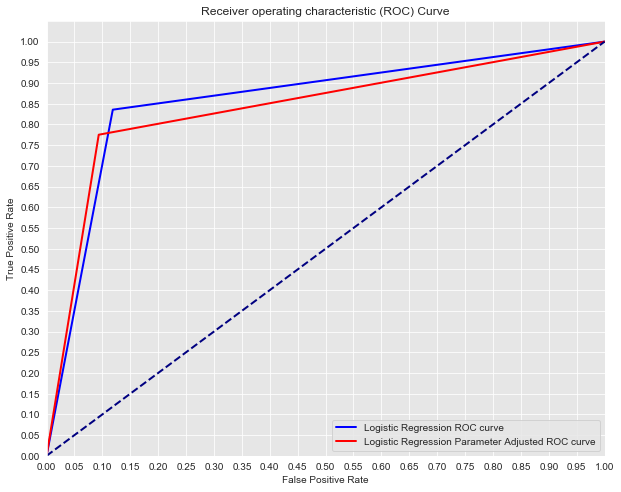

In [46]:
print('Resampled')
print('Logistic Regression AUC: {}'.format(auc(false_positive_train_rate_lr, true_positive_train_rate_lr)))
print('Logistic Regression Parameter Adjusted AUC: {}'.format(auc(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr)))



sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(false_positive_train_rate_lr, true_positive_train_rate_lr, color='blue',
         lw=lw, label='Logistic Regression ROC curve')
plt.plot(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr, color='red',
         lw=lw, label='Logistic Regression Parameter Adjusted ROC curve')



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree classification uses node decition splits to parce data with high entropy to achieve maximum information 
gain.   

Initiate and fit the Decision Tree model.

In [47]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=10)  

decision_tree.fit(scaled_data_train_resampled, y_train_resampled) 

DecisionTreeClassifier(random_state=10)

Generate predictions.

In [48]:
y_hat_train_dt = decision_tree.predict(scaled_data_train_resampled)

Perform cross Validation.


In [49]:
dt_cv_score = cross_val_score(decision_tree, scaled_data_test, y_test, cv=5)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 84.91%


All features have a positive effect on Revenue.  PageValues has the largest effect on Revenue.  

In [50]:
importance_dt = decision_tree.feature_importances_

for i,c in zip(importance_dt,df_columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: Administrative, Score: 0.0351412477874982
Feature: Administrative_Duration, Score: 0.0275903031814585
Feature: Informational, Score: 0.009430307458501203
Feature: Informational_Duration, Score: 0.011861290805253877
Feature: ProductRelated, Score: 0.03950819411374403
Feature: ProductRelated_Duration, Score: 0.037518612565608796
Feature: BounceRates, Score: 0.024448587541970858
Feature: ExitRates, Score: 0.03901603257523429
Feature: PageValues, Score: 0.6360873309326638
Feature: SpecialDay, Score: 0.0010649980070813032
Feature: Month, Score: 0.04511532758430198
Feature: OperatingSystems, Score: 0.016886456114676988
Feature: Browser, Score: 0.011125476582950914
Feature: Region, Score: 0.016438190628751
Feature: TrafficType, Score: 0.03965230071409982
Feature: VisitorType, Score: 0.002799458813605459
Feature: Weekend, Score: 0.006315884592598971


<BarContainer object of 17 artists>

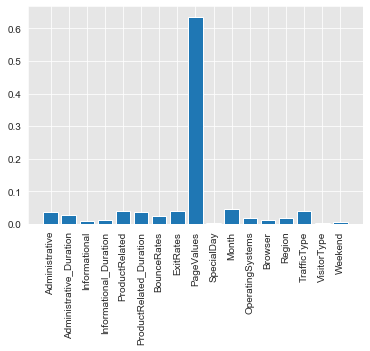

In [51]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_dt)

Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true 
positives and more true negatives at the expense of more false negatives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [52]:
Metrics(y_train_resampled,y_hat_train_dt)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


The model correctly classified 7646 observations as false, true negatives, and 6360 observations as true, true positives, 
and misclassified 687 observations as true, false positives, and 1973 observations as false, false negatives.  

In [53]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train_resampled, y_hat_train_dt, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,8333,0,8333
1,0,8333,8333
All,8333,8333,16666


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [54]:
false_positive_train_rate_dt, true_positive_train_rate_dt, thresholds = roc_curve(y_train_resampled, y_hat_train_dt)
roc_auc = auc(false_positive_train_rate_dt, true_positive_train_rate_dt)

AUC: 1.0


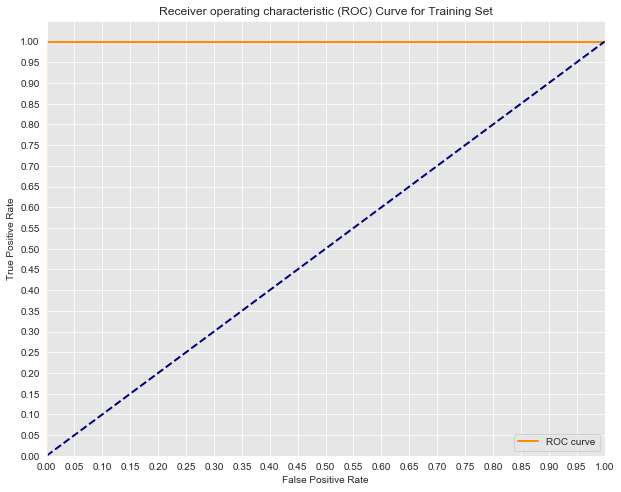

In [55]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_dt, true_positive_train_rate_dt, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_dt, true_positive_train_rate_dt)))
plt.show()

Bagged Trees classification has multiple trees that together lower model variance and considers all features simultaneously 
to utilize the training data for classification.  

Instantiate and fit Bagged Trees model.

In [57]:
from sklearn.ensemble import BaggingClassifier

bagged_trees =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
bagged_trees.fit(scaled_data_train_resampled, y_train_resampled)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

Generate predictions.

In [58]:
y_hat_train_bt = bagged_trees.predict(scaled_data_train_resampled)

Perform Cross Validation.

In [59]:
bt_cv_score = cross_val_score(bagged_trees, scaled_data_test, y_test, cv=5)
mean_bt_cv_score = np.mean(bt_cv_score)

print(f"Mean Cross Validation Score: {mean_bt_cv_score :.2%}")

Mean Cross Validation Score: 88.89%


Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true 
positives and more true negatives at the expense of more false negatives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [60]:
Metrics(y_train_resampled,y_hat_train_bt)

Precision Score: 0.8991259154264115
Recall Score: 0.9134765390615625
Accuracy Score: 0.9054962198487939
F1 Score: 0.9062444193106732


The model correctly classified 7479 observations as false, true negatives, and 7612 observations as true, true positives, 
and misclassified 854 observations as true, false positives, and 721 observations as false, false negatives.  

In [61]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train_resampled, y_hat_train_bt, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,7479,854,8333
1,721,7612,8333
All,8200,8466,16666


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [62]:
false_positive_train_rate_bt, true_positive_train_rate_bt, thresholds = roc_curve(y_train_resampled,y_hat_train_bt)
roc_auc = auc(false_positive_train_rate_bt, true_positive_train_rate_bt)

AUC: 0.905496219848794


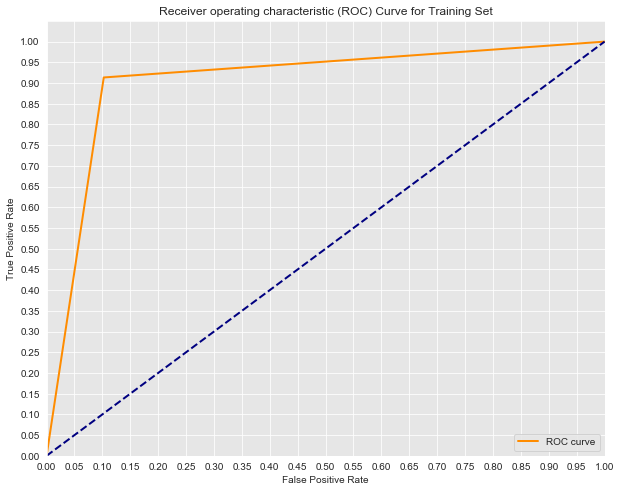

In [63]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_bt, true_positive_train_rate_bt, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_bt, true_positive_train_rate_bt)))
plt.show()

Random Forest classification has multiple trees that together lower model variance and considers subsets of features that 
are then compared and the optimal subset utilizes the training data for classification.  

Initiate and fit the Decision Tree model.

In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

random_forest.fit(scaled_data_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5)

Generate predictions.

In [66]:
y_hat_train_rf = random_forest.predict(scaled_data_train_resampled)

Perform Cross Validation.  

In [67]:
rf_cv_score = cross_val_score(random_forest, scaled_data_test, y_test, cv=5)
mean_rf_cv_score = np.mean(rf_cv_score)

print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score: 89.05%


All features have a positive effect on Revenue.  PageValues has the largest effect on Revenue.  

In [68]:
importance_rf = random_forest.feature_importances_

for i,c in zip(importance_rf,df_columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: Administrative, Score: 0.07237857410923436
Feature: Administrative_Duration, Score: 0.02201405361009251
Feature: Informational, Score: 0.004494294738260727
Feature: Informational_Duration, Score: 0.003405895026449611
Feature: ProductRelated, Score: 0.028902624707112655
Feature: ProductRelated_Duration, Score: 0.04658521656460992
Feature: BounceRates, Score: 0.02685631879654375
Feature: ExitRates, Score: 0.07514045971769098
Feature: PageValues, Score: 0.637991728101459
Feature: SpecialDay, Score: 0.0012708053477296585
Feature: Month, Score: 0.03858510544221053
Feature: OperatingSystems, Score: 0.0044423376810454425
Feature: Browser, Score: 0.0021191751315619207
Feature: Region, Score: 0.0036303420427650497
Feature: TrafficType, Score: 0.025425993538773946
Feature: VisitorType, Score: 0.006541583940865379
Feature: Weekend, Score: 0.00021549150359462263


<BarContainer object of 17 artists>

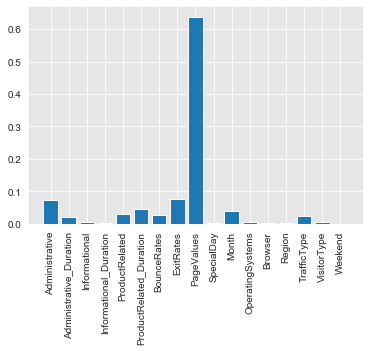

In [69]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_rf)

Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true 
positives and more true negatives at the expense of more false negatives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [70]:
Metrics(y_train_resampled,y_hat_train_rf)

Precision Score: 0.8900129396541583
Recall Score: 0.9079563182527302
Accuracy Score: 0.8978759150366015
F1 Score: 0.8988950932636331


The model correctly classified 7398 observations as false, true negatives, and 7566 observations as true, true positives, 
and misclassified 935 observations as true, false positives, and 767 observations as false, false negatives.  

In [72]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train_resampled, y_hat_train_rf, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,7398,935,8333
1,767,7566,8333
All,8165,8501,16666


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [73]:
false_positive_train_rate_rf, true_positive_train_rate_rf, thresholds = roc_curve(y_train_resampled,y_hat_train_rf)
roc_auc = auc(false_positive_train_rate_rf, true_positive_train_rate_rf)

AUC: 0.8978759150366015


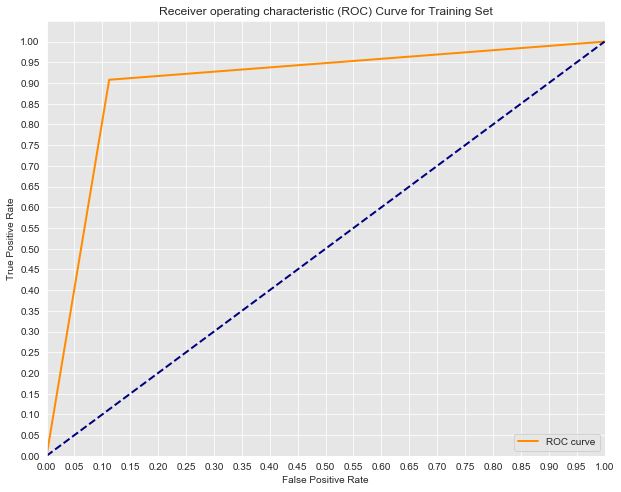

In [74]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_rf, true_positive_train_rate_rf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_rf, true_positive_train_rate_rf)))
plt.show()

Gradient Boost classification utilizes trees that build upon nodes according to which node has the minimum prediction error.  

Initiate and fit the Gradient Boost model.

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier(random_state=42)

gradient_boost.fit(scaled_data_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

GradientBoosting model predictions.  

In [76]:
y_hat_train_gb = gradient_boost.predict(scaled_data_train_resampled)

Perform cross validation.  

In [77]:
gb_cv_score = cross_val_score(gradient_boost, scaled_data_test, y_test, cv=5)
mean_gb_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_gb_cv_score :.2%}")

Mean Cross Validation Score: 84.91%


All features have a positive effect on Revenue except Special Day, which has no effect on Revenue.  PageValues has the largest effect on Revenue.  

In [78]:
importance_gb = gradient_boost.feature_importances_

for i,c in zip(importance_gb,df_columns):
    print(f'Feature: {c} Score: {i}')

Feature: Administrative Score: 0.03380148381665124
Feature: Administrative_Duration Score: 0.002413389305866455
Feature: Informational Score: 0.005702419962563934
Feature: Informational_Duration Score: 0.0012295229607771913
Feature: ProductRelated Score: 0.009349035330267149
Feature: ProductRelated_Duration Score: 0.006248244958870753
Feature: BounceRates Score: 0.004847659844307301
Feature: ExitRates Score: 0.005802235397831561
Feature: PageValues Score: 0.8133497000971565
Feature: SpecialDay Score: 0.0
Feature: Month Score: 0.05766118687544535
Feature: OperatingSystems Score: 0.005467007072886055
Feature: Browser Score: 0.004032037419428169
Feature: Region Score: 0.014278366070502431
Feature: TrafficType Score: 0.0320742782747568
Feature: VisitorType Score: 0.003275688042417492
Feature: Weekend Score: 0.0004677445702716826


<BarContainer object of 17 artists>

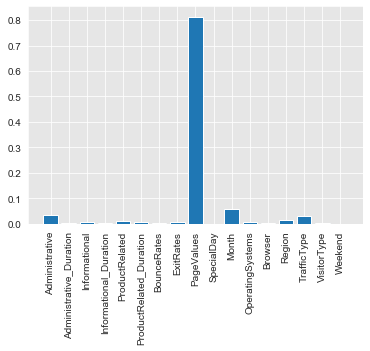

In [79]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_gb)

Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true 
positives and more true negatives at the expense of more false negatives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [80]:
Metrics(y_train_resampled,y_hat_train_gb)

Precision Score: 0.9294201520912547
Recall Score: 0.9386775471018841
Accuracy Score: 0.9336973478939158
F1 Score: 0.9340259119947459


The model correctly classified 7739 observations as false, true negatives, and 7822 observations as true, true positives, 
and misclassified 594 observations as true, false positives, and 511 observations as false, false negatives.  

In [81]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train_resampled, y_hat_train_gb, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,7739,594,8333
1,511,7822,8333
All,8250,8416,16666


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [82]:
false_positive_train_rate_gb, true_positive_train_rate_gb, thresholds = roc_curve(y_train_resampled,y_hat_train_gb)
roc_auc = auc(false_positive_train_rate_gb, true_positive_train_rate_gb)

AUC: 0.9336973478939157


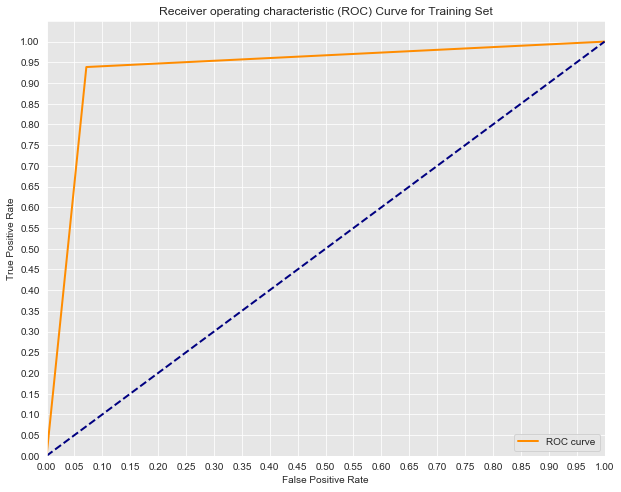

In [83]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_gb, true_positive_train_rate_gb, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_gb, true_positive_train_rate_gb)))
plt.show()

ROC model comaprison 

Logistic Regression AUC: 0.8585143405736231
Decision Tree AUC: 1.0
Bagged Trees AUC: 0.905496219848794
Random Forest AUC: 0.8978759150366015
Gradient Boost AUC: 0.9336973478939157


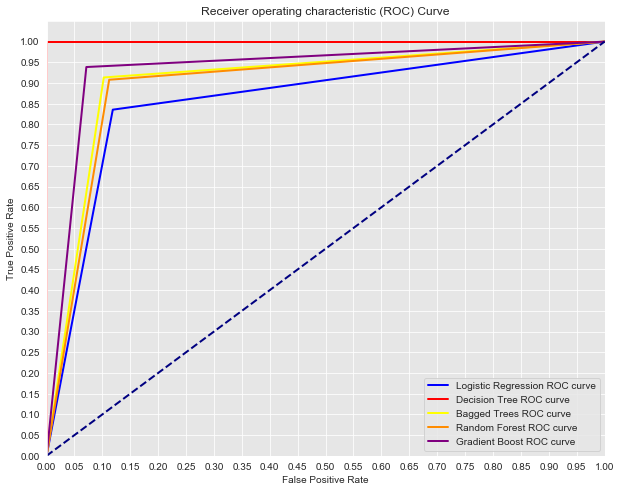

In [84]:
print('Logistic Regression AUC: {}'.format(auc(false_positive_train_rate_lr, true_positive_train_rate_lr)))
print('Decision Tree AUC: {}'.format(auc(false_positive_train_rate_dt, true_positive_train_rate_dt)))
print('Bagged Trees AUC: {}'.format(auc(false_positive_train_rate_bt, true_positive_train_rate_bt)))
print('Random Forest AUC: {}'.format(auc(false_positive_train_rate_rf, true_positive_train_rate_rf)))
print('Gradient Boost AUC: {}'.format(auc(false_positive_train_rate_gb, true_positive_train_rate_gb)))


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(false_positive_train_rate_lr, true_positive_train_rate_lr, color='blue',
         lw=lw, label='Logistic Regression ROC curve')
plt.plot(false_positive_train_rate_dt, true_positive_train_rate_dt, color='red',
         lw=lw, label='Decision Tree ROC curve')
plt.plot(false_positive_train_rate_bt, true_positive_train_rate_bt, color='yellow',
         lw=lw, label='Bagged Trees ROC curve')
plt.plot(false_positive_train_rate_rf, true_positive_train_rate_rf, color='darkorange',
         lw=lw, label='Random Forest ROC curve')
plt.plot(false_positive_train_rate_gb, true_positive_train_rate_gb, color='purple',
         lw=lw, label='Gradient Boost ROC curve')


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC.png')
plt.show()

Conclusion

Classifying revenue when there is no revenue will lead to models that are built upon false revenue making assumtions and 
classifying no revenue when there is revenue will lead to models that are missing revenue making assumtions.  
All of the models have good precision and recall, and therefore, are efficient in classifying whether revenue occured.  The 
models have good accuracy and f1 scores.  The models ROC curves all indicate that the true positive rate is larger than the 
false positive rate.  The feature that is the most likely positive predictor for revenue is PageValue, the average amount 
of times a page leads to revenue.  